<a href="https://colab.research.google.com/github/Gonzalo2408/Applied-ML/blob/main/Assignment1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


## Load data

In [32]:
data = pd.read_csv('train_data.csv')

In [33]:
data

,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose,target
0,15427464874523186,2,11,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,23.0,23.0,0.0,4,28,2
1,15427464874523186,9,11,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,17.0,4,21,2
2,53852196172413351,11,10,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,0.0,4,11,2
3,63848905825323247,25,7,2021,NaN,NaN,0.000000,NaN,NaN,81.1167,...,True,True,False,1.0,40.0,12.0,-5.0,3,5,2
4,63848905825323247,1,8,2021,NaN,NaN,6.128259,NaN,283.769836,NaN,...,True,False,False,0.0,40.0,40.0,0.0,3,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,9186677120757296287,22,11,2021,NaN,37.99,0.000000,37.99,152.677213,37.9900,...,True,False,False,0.0,32.0,32.0,0.0,4,23,0
1589,9186677120757296287,29,11,2021,NaN,37.99,0.000000,37.99,NaN,37.9900,...,True,False,False,0.0,32.0,32.0,0.0,4,14,0
1590,9186677120757296287,6,12,2021,NaN,37.99,0.000000,37.99,NaN,37.9900,...,True,False,False,0.0,32.0,32.0,0.0,4,7,0
1591,9188987770029297576,1,7,2021,NaN,NaN,0.000000,NaN,762.964781,NaN,...,True,True,False,-3.0,34.0,0.0,-34.0,3,30,0


In [34]:
#Labels (quite imbalanced)
data['target'].value_counts()

2    1032
1     314
0     247
Name: target, dtype: int64

## Preprocessing

In [35]:
#Data with no missing values (from 2651 to 413 lol)
data.dropna(axis=1, inplace=True)

In [36]:
data

,opportunity_id,current_date_day,current_date_month,current_date_year,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,RESPONSE_TIME__total_email_customer_response_time__last_14_days,QUESTIONS__std_num_of_questions_in_calls_by_company__from_opp_creation,COMMUNICATION_ACTIVITY__total_emails__last_7_days,CRM__total_num_of_amount_update_crm_events__last_21_days,CRM__days_since_last_crm_amount_change,...,opportunity_probability_at_time_of_weekstart,opportunity_amount_at_time_of_weekstart,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,current_quarter,timetoclose,target
0,15427464874523186,2,11,2021,0.000000,37.122222,0.000000,2.0,1.0,1.000000,...,60.0,18958.00,True,False,False,23.0,23.0,4,28,2
1,15427464874523186,9,11,2021,0.000000,1.821667,0.000000,18.0,11.0,0.678113,...,100.0,42444.45,True,False,False,40.0,40.0,4,21,2
2,53852196172413351,11,10,2021,0.000000,128.610833,0.000000,24.0,8.0,0.061968,...,100.0,1219.52,True,False,False,40.0,40.0,4,11,2
3,63848905825323247,25,7,2021,0.000000,46.775278,6.500000,7.0,2.0,12.034595,...,5.0,9800.00,True,True,False,40.0,12.0,3,5,2
4,63848905825323247,1,8,2021,6.128259,69.038611,6.368673,20.0,8.0,0.687951,...,100.0,9821.34,True,False,False,40.0,40.0,3,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,9186677120757296287,22,11,2021,0.000000,0.025833,0.471405,4.0,0.0,60.061227,...,95.0,11400.00,True,False,False,32.0,32.0,4,23,0
1589,9186677120757296287,29,11,2021,0.000000,0.025833,0.471405,0.0,0.0,67.061227,...,95.0,11400.00,True,False,False,32.0,32.0,4,14,0
1590,9186677120757296287,6,12,2021,0.000000,0.000000,0.471405,0.0,0.0,74.061227,...,95.0,11400.00,True,False,False,32.0,32.0,4,7,0
1591,9188987770029297576,1,7,2021,0.000000,263.661389,12.472191,14.0,2.0,0.856065,...,95.0,13400.00,True,True,False,34.0,0.0,3,30,0


In [37]:
#Checking correlations
corr = data.corr()

In [38]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

#Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [78]:
#Removed variables with corr > 0.95 (from 413 to 208)
data

,opportunity_id,current_date_day,current_date_month,current_date_year,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,RESPONSE_TIME__total_email_customer_response_time__last_14_days,QUESTIONS__std_num_of_questions_in_calls_by_company__from_opp_creation,COMMUNICATION_ACTIVITY__total_emails__last_7_days,CRM__total_num_of_amount_update_crm_events__last_21_days,CRM__days_since_last_crm_amount_change,...,CRM__total_num_of_close_date_update_crm_events__from_opp_creation,sort_order_at_time_of_weekstart,opportunity_amount_at_time_of_weekstart,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,timetoclose,target
0,15427464874523186,2,11,2021,0.000000,37.122222,0.000000,2.0,1.0,1.000000,...,1.0,6,18958.00,True,False,False,23.0,23.0,28,2
1,15427464874523186,9,11,2021,0.000000,1.821667,0.000000,18.0,11.0,0.678113,...,2.0,17,42444.45,True,False,False,40.0,40.0,21,2
2,53852196172413351,11,10,2021,0.000000,128.610833,0.000000,24.0,8.0,0.061968,...,2.0,17,1219.52,True,False,False,40.0,40.0,11,2
3,63848905825323247,25,7,2021,0.000000,46.775278,6.500000,7.0,2.0,12.034595,...,3.0,2,9800.00,True,True,False,40.0,12.0,5,2
4,63848905825323247,1,8,2021,6.128259,69.038611,6.368673,20.0,8.0,0.687951,...,4.0,17,9821.34,True,False,False,40.0,40.0,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,9186677120757296287,22,11,2021,0.000000,0.025833,0.471405,4.0,0.0,60.061227,...,8.0,14,11400.00,True,False,False,32.0,32.0,23,0
1589,9186677120757296287,29,11,2021,0.000000,0.025833,0.471405,0.0,0.0,67.061227,...,8.0,14,11400.00,True,False,False,32.0,32.0,14,0
1590,9186677120757296287,6,12,2021,0.000000,0.000000,0.471405,0.0,0.0,74.061227,...,8.0,14,11400.00,True,False,False,32.0,32.0,7,0
1591,9188987770029297576,1,7,2021,0.000000,263.661389,12.472191,14.0,2.0,0.856065,...,5.0,15,13400.00,True,True,False,34.0,0.0,30,0


In [93]:
#Counting boolean variables. Convert them to int
data.dtypes.value_counts()

float64    198
int64        7
bool         3
dtype: int64

In [95]:
data["forecast_category_at_time_of_weekstart_1_Commit"] = data["forecast_category_at_time_of_weekstart_1_Commit"].astype(int)
data["forecast_category_at_time_of_weekstart_3_Best_Case"] = data["forecast_category_at_time_of_weekstart_3_Best_Case"].astype(int)
data["forecast_category_at_time_of_weekstart_4_Pipeline"] = data["forecast_category_at_time_of_weekstart_4_Pipeline"].astype(int)

In [96]:
data

,opportunity_id,current_date_day,current_date_month,current_date_year,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,RESPONSE_TIME__total_email_customer_response_time__last_14_days,QUESTIONS__std_num_of_questions_in_calls_by_company__from_opp_creation,COMMUNICATION_ACTIVITY__total_emails__last_7_days,CRM__total_num_of_amount_update_crm_events__last_21_days,CRM__days_since_last_crm_amount_change,...,CRM__total_num_of_close_date_update_crm_events__from_opp_creation,sort_order_at_time_of_weekstart,opportunity_amount_at_time_of_weekstart,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,timetoclose,target
0,15427464874523186,2,11,2021,0.000000,37.122222,0.000000,2.0,1.0,1.000000,...,1.0,6,18958.00,1,0,0,23.0,23.0,28,2
1,15427464874523186,9,11,2021,0.000000,1.821667,0.000000,18.0,11.0,0.678113,...,2.0,17,42444.45,1,0,0,40.0,40.0,21,2
2,53852196172413351,11,10,2021,0.000000,128.610833,0.000000,24.0,8.0,0.061968,...,2.0,17,1219.52,1,0,0,40.0,40.0,11,2
3,63848905825323247,25,7,2021,0.000000,46.775278,6.500000,7.0,2.0,12.034595,...,3.0,2,9800.00,1,1,0,40.0,12.0,5,2
4,63848905825323247,1,8,2021,6.128259,69.038611,6.368673,20.0,8.0,0.687951,...,4.0,17,9821.34,1,0,0,40.0,40.0,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,9186677120757296287,22,11,2021,0.000000,0.025833,0.471405,4.0,0.0,60.061227,...,8.0,14,11400.00,1,0,0,32.0,32.0,23,0
1589,9186677120757296287,29,11,2021,0.000000,0.025833,0.471405,0.0,0.0,67.061227,...,8.0,14,11400.00,1,0,0,32.0,32.0,14,0
1590,9186677120757296287,6,12,2021,0.000000,0.000000,0.471405,0.0,0.0,74.061227,...,8.0,14,11400.00,1,0,0,32.0,32.0,7,0
1591,9188987770029297576,1,7,2021,0.000000,263.661389,12.472191,14.0,2.0,0.856065,...,5.0,15,13400.00,1,1,0,34.0,0.0,30,0


## Train test split

In [100]:
X = data.drop(['target'], axis=1)
y = data['target']

In [101]:
print(X.shape)
print(y.shape)

(1593, 207)
(1593,)


In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1274, 207)
(319, 207)
(1274,)
(319,)


## Classification model

In [118]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
pred = clf.predict(X_test)


In [128]:
conf_matrix = confusion_matrix(Y_test, pred)

print('Precision: %.3f' % precision_score(Y_test, pred, average='weighted'))
print('Recall: %.3f' % recall_score(Y_test, pred, average='weighted'))
print('Accuracy: %.3f' % accuracy_score(Y_test, pred))
print('F1 Score: %.3f' % f1_score(Y_test, pred, average='weighted'))

Precision: 0.463
Recall: 0.680
Accuracy: 0.680
F1 Score: 0.551


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


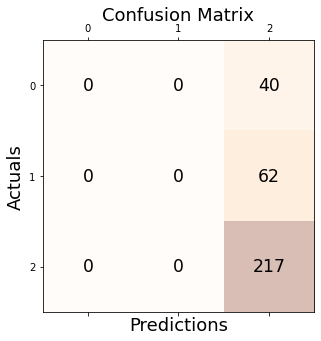

In [131]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()